# Prepare

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import env
import acquire

**Get dataq**

In [2]:
# db_name = "tsa_item_demand"
# query = """
# SELECT *
# FROM items
# JOIN sales USING(item_id)
# JOIN stores USING(store_id);
# """

# # using codeup dataset
# items = pd.read_sql(query, env.get_db_access(db_name))

# # save to csv
# items.to_csv("./store_item_sales.csv", mode= "w")

In [3]:
# read in the data
store_items = pd.read_csv("store_item_sales.csv", index_col= 0)

store_items.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_date,sale_amount,store_address,store_zipcode,store_city,store_state
0,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,2013-01-01,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,2013-01-02,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,2013-01-03,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,4,2013-01-04,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,5,2013-01-05,10,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


In [4]:
store_items.shape

(913000, 14)

In [5]:
store_items.dtypes

store_id           int64
item_id            int64
item_upc14         int64
item_upc12         int64
item_brand        object
item_name         object
item_price       float64
sale_id            int64
sale_date         object
sale_amount        int64
store_address     object
store_zipcode      int64
store_city        object
store_state       object
dtype: object

**Convert date column data types**

In [6]:
# change the datatype of sale date
store_items.sale_date = store_items.sale_date.astype("datetime64")

**Set the index to be the datetime variable**

In [7]:
# set index
store_items = store_items.set_index("sale_date")
store_items.head(3)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-02,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-03,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


**Plot the distributions**

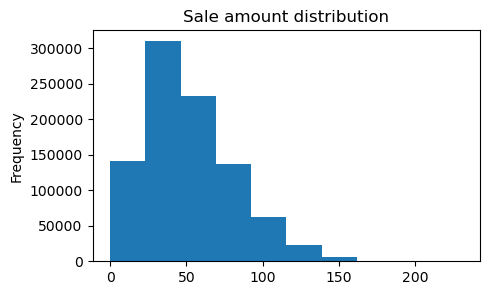

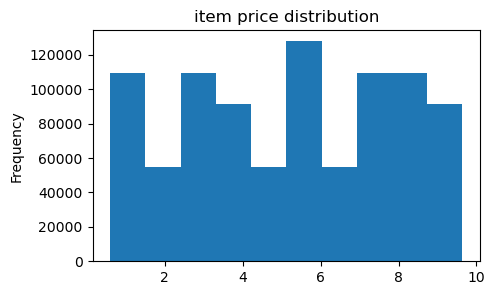

In [8]:
plt.figure(figsize=(5,3))
store_items.sale_amount.plot(kind="hist")
plt.title("Sale amount distribution")
plt.show()

plt.figure(figsize=(5,3))
store_items.item_price.plot(kind="hist")
plt.title("item price distribution")
plt.show()

**Add a 'month' and 'day of week' column to your dataframe.**

In [9]:
# Add a 'month' and 'day of week' column to your dataframe
store_items["month"] = store_items.index.month
store_items["month_name"] = store_items.index.month_name()
store_items["weekday"] = store_items.index.weekday
store_items["weekday_name"] = store_items.index.day_name()
store_items["day"] = store_items.index.day

In [10]:
store_items.head(1)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,month_name,weekday,weekday_name,day
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,January,1,Tuesday,1


**Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price**

In [11]:
# create a total sale colum
store_items["sales_total"] = store_items.sale_amount * store_items.item_price

**Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.**

In [12]:
def get_store_item_sales_clean():
    if os.path.exists("./store_item_sales.csv"):
        # read in the data
        store_items = pd.read_csv("store_item_sales.csv", index_col= 0)
    else:
        db_name = "tsa_item_demand"
        query = """
        SELECT *
        FROM items
        JOIN sales USING(item_id)
        JOIN stores USING(store_id);
        """

        # using codeup dataset
        store_items = pd.read_sql(query, env.get_db_access(db_name))

        # save to csv
        store_items.to_csv("./store_item_sales.csv", mode= "w")
        
    # change the datatype of sale date
    store_items.sale_date = store_items.sale_date.astype("datetime64")
    
    # set index
    store_items = store_items.set_index("sale_date")
    
    # Add a 'month' and 'day of week' column to your dataframe
    store_items["month"] = store_items.index.month
    store_items["month_name"] = store_items.index.month_name()
    store_items["weekday"] = store_items.index.weekday
    store_items["weekday_name"] = store_items.index.day_name()
    store_items["day"] = store_items.index.day
    
    # create a total sale colum
    store_items["sales_total"] = store_items.sale_amount * store_items.item_price

    return store_items

In [13]:
get_store_item_sales_clean().head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,month_name,weekday,weekday_name,day,sales_total
sale_date,,,,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,January,1,Tuesday,1,10.92
2013-01-02,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,January,2,Wednesday,2,9.24
2013-01-03,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,January,3,Thursday,3,11.76
2013-01-04,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,4,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,January,4,Friday,4,10.92
2013-01-05,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,5,10,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,January,5,Saturday,5,8.40


**Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:**

In [2]:
ops = acquire.starwars_data()
ops.head()

,name_x,rotation_period_x,orbital_period_x,diameter_x,climate_x,gravity_x,terrain_x,surface_water_x,population_x,residents_x,...,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url_y
0,Tatooine,23,304,10465,arid,1 standard,desert,1,200000,https://swapi.dev/api/people/1/,...,19BBY,male,https://swapi.dev/api/planets/1/,https://swapi.dev/api/films/1/,NaN,https://swapi.dev/api/vehicles/14/,https://swapi.dev/api/starships/12/,2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
1,Tatooine,23,304,10465,arid,1 standard,desert,1,200000,https://swapi.dev/api/people/1/,...,19BBY,male,https://swapi.dev/api/planets/1/,https://swapi.dev/api/films/1/,NaN,https://swapi.dev/api/vehicles/14/,https://swapi.dev/api/starships/22/,2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
2,Tatooine,23,304,10465,arid,1 standard,desert,1,200000,https://swapi.dev/api/people/1/,...,19BBY,male,https://swapi.dev/api/planets/1/,https://swapi.dev/api/films/1/,NaN,https://swapi.dev/api/vehicles/30/,https://swapi.dev/api/starships/12/,2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
3,Tatooine,23,304,10465,arid,1 standard,desert,1,200000,https://swapi.dev/api/people/1/,...,19BBY,male,https://swapi.dev/api/planets/1/,https://swapi.dev/api/films/1/,NaN,https://swapi.dev/api/vehicles/30/,https://swapi.dev/api/starships/22/,2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
4,Tatooine,23,304,10465,arid,1 standard,desert,1,200000,https://swapi.dev/api/people/1/,...,19BBY,male,https://swapi.dev/api/planets/1/,https://swapi.dev/api/films/2/,NaN,https://swapi.dev/api/vehicles/14/,https://swapi.dev/api/starships/12/,2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/


In [3]:
ops.dtypes

name_x               object
rotation_period_x    object
orbital_period_x     object
diameter_x           object
climate_x            object
gravity_x            object
terrain_x            object
surface_water_x      object
population_x         object
residents_x          object
films_x              object
created_x            object
edited_x             object
url_x                object
name_y               object
rotation_period_y    object
orbital_period_y     object
diameter_y           object
climate_y            object
gravity_y            object
terrain_y            object
surface_water_y      object
population_y         object
residents_y          object
films_y              object
created_y            object
edited_y             object
name                 object
height               object
mass                 object
hair_color           object
skin_color           object
eye_color            object
birth_year           object
gender               object
homeworld           

**Convert date column to datetime format**

In [4]:
# covert date columns to datetime
ops.created = ops.created.astype("datetime64")
ops.edited = ops.edited.astype("datetime64")

In [9]:
selected_obj = ops.select_dtypes("object")

# find all columns that should be numeric
num_cols = selected_obj.columns[~selected_obj.columns.isin(["hair_color", "skin_color", "eye_color", "birth_year",
                                                             "gender", "name", "terrain_y", "climate_y", "name_y"])]
num_cols

Index(['name_x', 'rotation_period_x', 'orbital_period_x', 'diameter_x',
       'climate_x', 'gravity_x', 'terrain_x', 'surface_water_x',
       'population_x', 'residents_x', 'films_x', 'created_x', 'edited_x',
       'url_x', 'rotation_period_y', 'orbital_period_y', 'diameter_y',
       'gravity_y', 'surface_water_y', 'population_y', 'residents_y',
       'films_y', 'created_y', 'edited_y', 'height', 'mass', 'homeworld',
       'films', 'species', 'vehicles', 'starships', 'url_y'],
      dtype='object')

In [16]:
for i in num_cols:
    # extract numeric values form strings
    num = ops["rotation_period_x"].str.findall(r'(\d+)')
    print(num)

Empty DataFrame
Columns: [0]
Index: []
               0
       match    
0      0      23
1      0      23
2      0      23
3      0      23
4      0      23
...           ..
194967 0      27
194968 0      27
194986 0      27
194987 0      28
194990 0      23

[194939 rows x 1 columns]
                0
       match     
0      0      304
1      0      304
2      0      304
3      0      304
4      0      304
...           ...
194967 0      318
194968 0      318
194986 0      384
194987 0      412
194990 0      378

[194939 rows x 1 columns]
                  0
       match       
0      0      10465
1      0      10465
2      0      10465
3      0      10465
4      0      10465
...             ...
194964 0      13400
194965 0      13400
194966 0      13400
194987 0      13800
194990 0      13850

[194959 rows x 1 columns]
Empty DataFrame
Columns: [0]
Index: []
              0
       match   
0      0      1
1      0      1
2      0      1
3      0      1
4      0      1
...          .

In [22]:
ops["rotation_period_x"].str.findall(r'(\d+)')

0         [23]
1         [23]
2         [23]
3         [23]
4         [23]
          ... 
194988      []
194989      []
194990    [23]
194991      []
194992      []
Name: rotation_period_x, Length: 194993, dtype: object

**Plot the distribution of each of your variables.**

TypeError: no numeric data to plot

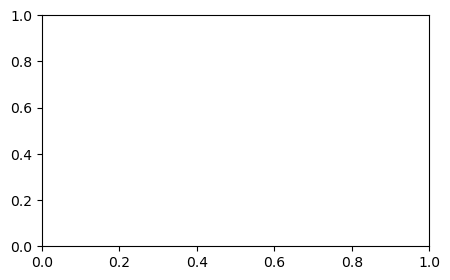

In [21]:
cols = ops.columns

for ele in cols:
    plt.figure(figsize = (5,3))
    ops[ele].plot(kind ="hist")
    plt.title(ele + " distribution")
    plt.show()

**Set the index to be the datetime variable.**

In [33]:
num_cols

Index(['name_x', 'rotation_period_x', 'orbital_period_x', 'diameter_x',
       'climate_x', 'gravity_x', 'terrain_x', 'surface_water_x',
       'population_x', 'residents_x', 'films_x', 'created_x', 'edited_x',
       'url_x', 'rotation_period_y', 'orbital_period_y', 'diameter_y',
       'gravity_y', 'surface_water_y', 'population_y', 'residents_y',
       'films_y', 'created_y', 'edited_y', 'height', 'mass', 'homeworld',
       'films', 'species', 'vehicles', 'starships', 'created', 'edited',
       'url_y'],
      dtype='object')

**Add a month and a year column to your dataframe.**

**Fill any missing values.**

**Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.**